# 강의안5  Pandas 기초

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.  Pandas 사용 사례

### 데이터프레임(DataFrame)의 소개

In [2]:
tips = sns.load_dataset("tips")     # seaborn 패키지에 내장된 tips 데이터 프레임 가저오기
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
type(tips)

pandas.core.frame.DataFrame

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
tips.info()       # info() 메소드는 데이터프레임 객체에 대한 정보를 제공한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### 데이터프레임을 이용한 탐색적 데이터 분석 (explorative data analysis)

In [7]:
tips["total_bill"].mean()    # total_bill 열의 자료에 대해서 평균값을 구함

19.78594262295082

In [8]:
tips["total_bill"].std()

8.902411954856856

In [9]:
tips.describe()     # 데이터프레임의 수치 데이터에 대한 기술통계량을 산출함

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


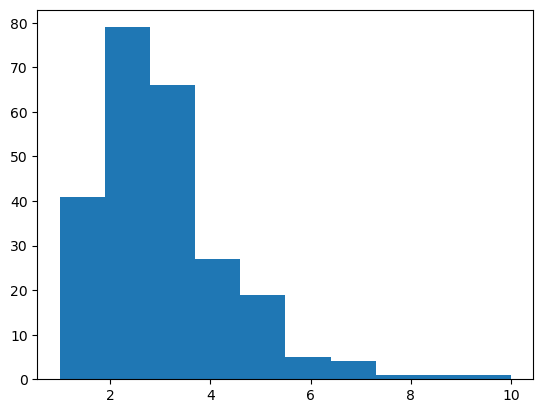

In [10]:
plt.hist(tips['tip'], bins=10)     # tip열의 자료에 대한 히스토그램을 그림 
plt.show()

In [11]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

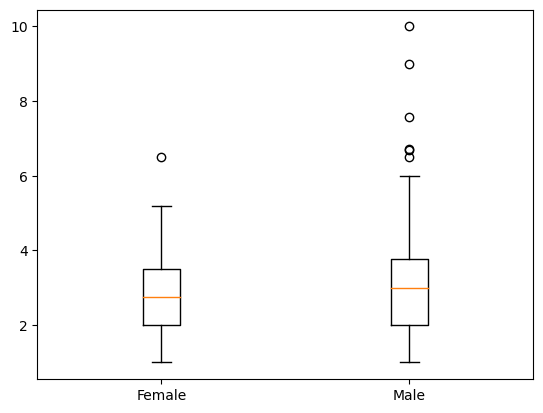

In [12]:
plt.boxplot([tips[tips['sex'] == 'Female']['tip'],
             tips[tips['sex'] == 'Male']['tip']],
             labels = ['Female', 'Male'])
plt.show()

In [13]:
tips.groupby('sex').tip.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [14]:
tips.groupby('sex').tip.std()

sex
Male      1.489102
Female    1.159495
Name: tip, dtype: float64

## 2. Pandas Series 데이터 객체

### Create a Series from a Python list

In [15]:
s1 = pd.Series([0.25, 0.5, 0.75, 1.0])    # 리스트로부터 pandas 시리즈 만들기
s1

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [16]:
type(s1)     # 데이터 유형을 확인하면 pandas의 series입을 확인할 수 있다.

pandas.core.series.Series

In [17]:
s1.values         # the values are simply a familiar Numpy array

array([0.25, 0.5 , 0.75, 1.  ])

In [18]:
type(s1.values)

numpy.ndarray

In [19]:
s1.index    # 별도의 index를 지정하기 않아 0부터 순차적인 번호가 부여되어 있다.

RangeIndex(start=0, stop=4, step=1)

In [20]:
type(s1.index)

pandas.core.indexes.range.RangeIndex

In [21]:
s1[1]     # 시리즈의 데이터의 indexing

0.5

In [22]:
s1[1:3]     # 시리스 데이터 slicing

1    0.50
2    0.75
dtype: float64

시리즈에 index 매개변수를 이용하여 명시적으로 index를 부여함

In [23]:
s2 = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a','b','c','d'])    # explicitly define index
s2

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [24]:
s2['b']       # value is accessed by an explicit index

0.5

In [25]:
s2['b':'d']    # explicit label을 사용할 경우 slicing에서 end point가 포함됨

b    0.50
c    0.75
d    1.00
dtype: float64

### Create a Series from a Python dictionary

In [26]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)        # Series created from a python dictionary
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [28]:
population['California']

38332521

In [29]:
population['California':'New York']     # Series support the slicing operation with explicit indices (end-point가 포함된다)

California    38332521
Texas         26448193
New York      19651127
dtype: int64

In [30]:
population[0:2]     # implicit index를 이용할 수 있으나 end-point는 포함되지 않는다.

California    38332521
Texas         26448193
dtype: int64

### Series 데이터 객체의 활용

In [31]:
s1

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [32]:
s1[0] = 0     # 시리즈는 immutable 이므로 값의 변경이 가능하다.
s1

0    0.00
1    0.50
2    0.75
3    1.00
dtype: float64

In [33]:
s1[0 : 2] = 0    # broadcasting으로 값이 할당된다.
s1

0    0.00
1    0.00
2    0.75
3    1.00
dtype: float64

#### 시리즈 요소값의 추가 및 삭제 

In [34]:
s1.append(s2)     # 매개변수에 시리즈가 입력됨

C:\Users\jwyoon\AppData\Local\Temp\ipykernel_1848\3167910705.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s1.append(s2)     # 매개변수에 시리즈가 입력됨


0    0.00
1    0.00
2    0.75
3    1.00
a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [35]:
s1.append(s2, ignore_index = True)

C:\Users\jwyoon\AppData\Local\Temp\ipykernel_1848\3140353956.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s1.append(s2, ignore_index = True)


0    0.00
1    0.00
2    0.75
3    1.00
4    0.25
5    0.50
6    0.75
7    1.00
dtype: float64

In [36]:
s1         # append() 메서드는 보여줄 뿐 값을 변경시키지 않는다

0    0.00
1    0.00
2    0.75
3    1.00
dtype: float64

In [37]:
pd.concat([s1, s2], ignore_index = True)

0    0.00
1    0.00
2    0.75
3    1.00
4    0.25
5    0.50
6    0.75
7    1.00
dtype: float64

In [39]:
s1.drop(3)    # 매개변수에 index를 입력

0    0.00
1    0.00
2    0.75
dtype: float64

In [40]:
s1  

0    0.00
1    0.00
2    0.75
3    1.00
dtype: float64

In [41]:
s1.drop(3, inplace=True)    # inplace 매개변수는 true로 설정하면 변경된 값이 할당된다.
s1

0    0.00
1    0.00
2    0.75
dtype: float64

In [42]:
s1 = pd.Series(range(5))
s1

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [43]:
s3 = pd.Series(range(5,10), index = (4,3,2,1,0))
s3

4    5
3    6
2    7
1    8
0    9
dtype: int64

In [44]:
s1 + s3

0    9
1    9
2    9
3    9
4    9
dtype: int64

In [45]:
s4 = pd.Series(range(5,9))
s4

0    5
1    6
2    7
3    8
dtype: int64

In [46]:
s1 + s4

0     5.0
1     7.0
2     9.0
3    11.0
4     NaN
dtype: float64

In [47]:
s1 + 2

0    2
1    3
2    4
3    5
4    6
dtype: int64

In [48]:
s1 * 2

0    0
1    2
2    4
3    6
4    8
dtype: int64

In [50]:
s1 * s4

0     0.0
1     6.0
2    14.0
3    24.0
4     NaN
dtype: float64

In [51]:
s1.mean()

2.0

In [52]:
s1.std()

1.5811388300841898

In [53]:
s1.min()

0

In [54]:
s1.max()

4

## 3. Pandas DataFrame 데이터 객체

### DataFrame 데이터 객체 특성

In [55]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [56]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [57]:
tips.index

RangeIndex(start=0, stop=244, step=1)

In [58]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [59]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [60]:
tips.values

array([[16.99, 1.01, 'Female', ..., 'Sun', 'Dinner', 2],
       [10.34, 1.66, 'Male', ..., 'Sun', 'Dinner', 3],
       [21.01, 3.5, 'Male', ..., 'Sun', 'Dinner', 3],
       ...,
       [22.67, 2.0, 'Male', ..., 'Sat', 'Dinner', 2],
       [17.82, 1.75, 'Male', ..., 'Sat', 'Dinner', 2],
       [18.78, 3.0, 'Female', ..., 'Thur', 'Dinner', 2]], dtype=object)

In [61]:
type(tips.values)

numpy.ndarray

###  DataFrame 데이터 객체의 생성

#### dictionary를 이용한 DataFrame의 생성

In [62]:
population = [423967, 695662, 141297, 170312,149995]
area = [38332521, 26448193, 19651127, 19552860, 12882135]
states = ['California', 'Texas', 'New York', 'Florida', 'Illinois']

dict = {'population': population, 'area': area}     # 관련된 딕셔너리를 생성함
df = pd.DataFrame(dict)      # 행 index가 지정되지 않은 경우 형 label은 일련번호로 지정된다.
df

,population,area
0,423967,38332521
1,695662,26448193
2,141297,19651127
3,170312,19552860
4,149995,12882135


In [63]:
df = pd.DataFrame(dict, index=states)   # index 매개변수를 이용하여 명시적으로 행 label을 지정한 경우
df

,population,area
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [64]:
df.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [65]:
type(df.index)

pandas.core.indexes.base.Index

In [66]:
df.columns

Index(['population', 'area'], dtype='object')

In [67]:
df.values

array([[  423967, 38332521],
       [  695662, 26448193],
       [  141297, 19651127],
       [  170312, 19552860],
       [  149995, 12882135]], dtype=int64)

In [68]:
df.items

<bound method DataFrame.items of             population      area
California      423967  38332521
Texas           695662  26448193
New York        141297  19651127
Florida         170312  19552860
Illinois        149995  12882135>

In [69]:
df.population

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: population, dtype: int64

#### 리스트에서 DataFrame 데이터 객체 생성하기

In [70]:
L = [ [423967, 38332521],
      [695662, 26448193],
      [141297, 19651127],
      [170312, 19552860],
      [149995, 12882135] ]
df  = pd.DataFrame(L)      # 리스트에서 데이터프레임을 생성
df

,0,1
0,423967,38332521
1,695662,26448193
2,141297,19651127
3,170312,19552860
4,149995,12882135


In [71]:
df = pd.DataFrame(L, columns = ['population', 'area'], index = states)   # 열과 행에 각각 label을 명시적으로 지정함
df

,population,area
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


#### 2차원 Numpy array에서 DataFrame 데이터 객체 생성하기

In [72]:
arr = np.array(L)     # 리스트에서 numpy array를 생성함
arr

array([[  423967, 38332521],
       [  695662, 26448193],
       [  141297, 19651127],
       [  170312, 19552860],
       [  149995, 12882135]])

In [73]:
df = pd.DataFrame(arr, columns = ['population', 'area'], index = states )
df

,population,area
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


#### 동일한 index의 Series를 사용한 데이터프레임 생성

In [74]:
s_population = pd.Series(arr[:,0], index=states)
s_population

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int32

In [75]:
s_area = pd.Series(arr[:,1], index=states)
s_area

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int32

In [76]:
df_states = pd.DataFrame({'population': s_population, 'area': s_area})
df_states

,population,area
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [77]:
type(df_states)

pandas.core.frame.DataFrame

### Create a DataFrame by reading a file 

In [78]:
df_sci = pd.read_csv('scientists.csv')
df_sci

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [79]:
df_sci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 448.0+ bytes


## 4. DataFrame Indexing and Selection

### 데이터프레임의 열단위 데이터 추출하기

In [80]:
df_sci['Name']     # 열이름을 지정하여 열을 추출함. 하나의 열인 경우는 시리즈로 반환됨

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [81]:
df_sci.Name      # 객체명.변수명의 방식으로 추출할 수도 있다. 하지만 속성과 구분이 되지 않는 문제점이 존재한다

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [82]:
df_sci[['Name', 'Occupation']]    # 두개 이상의 열인 경우는 데이터프레임으로 반환됨

,Name,Occupation
0,Rosaline Franklin,Chemist
1,William Gosset,Statistician
2,Florence Nightingale,Nurse
3,Marie Curie,Chemist
4,Rachel Carson,Biologist
5,John Snow,Physician
6,Alan Turing,Computer Scientist
7,Johann Gauss,Mathematician


### 데이터프레임의 행단위 데이터 추출하기

In [84]:
# df_sci[0, :]     # Numpy와 같이 행과 열을 콤머(,) 구분하여 행을 추출할 수 없다.

#### loc 속성을 이용하여 행에 명시적으로 label이 지정된 경우

In [85]:
df_states.loc['California']     # loc 속성을 이용하여 명시적 index 이름으로 행단위 데이터 추출

population      423967
area          38332521
Name: California, dtype: int32

In [86]:
df_states.loc

In [87]:
df_states.loc[['California', 'New York']]   # 여러개의 행을 추출하는 경우

,population,area
California,423967,38332521
New York,141297,19651127


In [89]:
df_states.loc['California': 'New York']    # silicing을 이용하며 부분을 추출함

,population,area
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


#### iloc 속성을 이용하여 implicit 하게 숫자로 지정하는 경우

In [90]:
df_states.iloc[0]      # iloc 속성을 이용하여 암묵적인 순서를 이용하여 행단위 데이터 추출

population      423967
area          38332521
Name: California, dtype: int32

In [91]:
df_states.iloc

In [92]:
df_states.iloc[[0,3]]

,population,area
California,423967,38332521
Florida,170312,19552860


In [93]:
df_states.iloc[0:3]   # iloc 속성을 이용하여 암문적 순서의 slicing으로 행단위 데이터 추출 (end-point는 포함하지 않는다)

,population,area
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


#### 행에 명시적으로label을 지정하지 않은 경우 loc, iloc 속성의 작동


In [94]:
df_sci.iloc[0]

Name          Rosaline Franklin
Born                 1920-07-25
Died                 1958-04-16
Age                          37
Occupation              Chemist
Name: 0, dtype: object

In [95]:
df_sci.loc[0]

Name          Rosaline Franklin
Born                 1920-07-25
Died                 1958-04-16
Age                          37
Occupation              Chemist
Name: 0, dtype: object

In [96]:
df_sci.iloc[0:3]    # index가 명시적으로 지정되지 않은 경우는 iloc속성으로 행자료 추출

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse


In [97]:
df_sci.loc[0:3]    # 명시적으로 표시하는 loc속성을 이용하면 end-point가 포합된다.

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist


In [98]:
df_sci.iloc[[0,2,5]]    # 연속되지 않은 행을 추출하기 위해서는 리스트로 전달함

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
5,John Snow,1813-03-15,1858-06-16,45,Physician


In [99]:
df_sci.iloc[-1]

Name           Johann Gauss
Born             1777-04-30
Died             1855-02-23
Age                      77
Occupation    Mathematician
Name: 7, dtype: object

In [100]:
# df_sci.loc[-1]     # loc 속성에서는 -1이 허용되지 않는다.

### 데이터프레임의 행과 열을 모두 지정하여 데이터 추출하기

In [101]:
df_states.loc['California', 'area']     # 행과 열을 모두 지정하여 데이터 추출하기

38332521

In [102]:
df_states.loc['California':'New York', 'area']   

California    38332521
Texas         26448193
New York      19651127
Name: area, dtype: int32

In [103]:
df_states.loc[['California', 'New York', 'Illinois'], :]

,population,area
California,423967,38332521
New York,141297,19651127
Illinois,149995,12882135


In [109]:
df_sci.loc[0:3, ['Name', 'Occupation']]

,Name,Occupation
0,Rosaline Franklin,Chemist
1,William Gosset,Statistician
2,Florence Nightingale,Nurse
3,Marie Curie,Chemist


In [104]:
# df_sci.iloc[0:3, ['Name', 'Occupation']]    # iloc 속성에서 두 가지 형식을 혼합하여 사용할 수 없다

In [105]:
df_sci.iloc[0:3, [0, 4]]

,Name,Occupation
0,Rosaline Franklin,Chemist
1,William Gosset,Statistician
2,Florence Nightingale,Nurse


### Filtering: 논리값 (boolean)을 이용한 행 추출하기 

In [106]:
df_states['population']> 200000

California     True
Texas          True
New York      False
Florida       False
Illinois      False
Name: population, dtype: bool

In [107]:
df_states[df_states['population'] > 200000]     # boolean selection

,population,area
California,423967,38332521
Texas,695662,26448193


In [108]:
df_sci

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [109]:
df_sci[df_sci['Age'] > df_sci['Age'].mean()]

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [110]:
df_sci['Age'].mean()

59.125

In [111]:
df_sci['Age'] > df_sci['Age'].mean()

0    False
1     True
2     True
3     True
4    False
5    False
6    False
7     True
Name: Age, dtype: bool

## 5. DataFrame의 데이터 기본적 조작

In [112]:
data = {'state' : ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year' : [2000, 2001, 2002, 2001, 2003, 2003],
         'pop' : [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2003,2.9
5,Nevada,2003,3.2


### DataFrame 변경하기

In [113]:
frame.loc[0 , 'pop'] = 99
frame

,state,year,pop
0,Ohio,2000,99.0
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2003,2.9
5,Nevada,2003,3.2


In [114]:
frame['pop'] = 11
frame

,state,year,pop
0,Ohio,2000,11
1,Ohio,2001,11
2,Ohio,2002,11
3,Nevada,2001,11
4,Nevada,2003,11
5,Nevada,2003,11


In [115]:
frame[['pop', 'year', 'state']]

,pop,year,state
0,11,2000,Ohio
1,11,2001,Ohio
2,11,2002,Ohio
3,11,2001,Nevada
4,11,2003,Nevada
5,11,2003,Nevada


In [116]:
pd.DataFrame(frame, columns = ['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,11
1,2001,Ohio,11
2,2002,Ohio,11
3,2001,Nevada,11
4,2003,Nevada,11
5,2003,Nevada,11


### 열 추가 및 삭제하기

In [117]:
frame['debt'] = 50     # 새로운 열 생성
frame

,state,year,pop,debt
0,Ohio,2000,11,50
1,Ohio,2001,11,50
2,Ohio,2002,11,50
3,Nevada,2001,11,50
4,Nevada,2003,11,50
5,Nevada,2003,11,50


In [118]:
frame2 = pd.DataFrame(data, columns = ['state', 'year', 'pop', 'debt'], 
                       index = ['one', 'two', 'three', 'four', 'five', 'six'])
frame2

,state,year,pop,debt
one,Ohio,2000,1.5,NaN
two,Ohio,2001,1.7,NaN
three,Ohio,2002,3.6,NaN
four,Nevada,2001,2.4,NaN
five,Nevada,2003,2.9,NaN
six,Nevada,2003,3.2,NaN


In [119]:
frame2['debt'] = 100
frame2

,state,year,pop,debt
one,Ohio,2000,1.5,100
two,Ohio,2001,1.7,100
three,Ohio,2002,3.6,100
four,Nevada,2001,2.4,100
five,Nevada,2003,2.9,100
six,Nevada,2003,3.2,100


In [120]:
frame2.drop(["debt"], axis = 1)

,state,year,pop
one,Ohio,2000,1.5
two,Ohio,2001,1.7
three,Ohio,2002,3.6
four,Nevada,2001,2.4
five,Nevada,2003,2.9
six,Nevada,2003,3.2


In [121]:
frame2

,state,year,pop,debt
one,Ohio,2000,1.5,100
two,Ohio,2001,1.7,100
three,Ohio,2002,3.6,100
four,Nevada,2001,2.4,100
five,Nevada,2003,2.9,100
six,Nevada,2003,3.2,100


In [122]:
frame2.drop(['debt', 'pop'], axis = 1, inplace = True)

In [123]:
frame2

,state,year
one,Ohio,2000
two,Ohio,2001
three,Ohio,2002
four,Nevada,2001
five,Nevada,2003
six,Nevada,2003


In [124]:
frame2.drop(['one'])

,state,year
two,Ohio,2001
three,Ohio,2002
four,Nevada,2001
five,Nevada,2003
six,Nevada,2003


## 6. 데이터프레임 기술통계량 산출

In [125]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
                index = ['a', 'b', 'c', 'd'], columns = ['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [126]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [128]:
df.sum(axis=0)

one    9.25
two   -5.80
dtype: float64

In [129]:
df.sum(axis = 1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [130]:
df.mean(axis = 'columns', skipna = False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [131]:
ages = df_sci["Age"]
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [132]:
type(ages)

pandas.core.series.Series

In [133]:
ages.mean()

59.125

In [134]:
ages.std()

18.325918413937288

In [135]:
ages.max()

90

In [136]:
ages.describe()

count     8.000000
mean     59.125000
std      18.325918
min      37.000000
25%      44.000000
50%      58.500000
75%      68.750000
max      90.000000
Name: Age, dtype: float64

In [137]:
ages + 100     # 사칙연산이 가능함

0    137
1    161
2    190
3    166
4    156
5    145
6    141
7    177
Name: Age, dtype: int64

In [138]:
df_sci.describe()

,Age
count,8.000000
mean,59.125000
std,18.325918
min,37.000000
25%,44.000000
50%,58.500000
75%,68.750000
max,90.000000


In [139]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


### 그룹 연산

In [140]:
tips.groupby('sex')['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [141]:
tips.groupby('sex').mean()

C:\Users\jwyoon\AppData\Local\Temp\ipykernel_1848\3408418991.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.groupby('sex').mean()


,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [142]:
tips.groupby('sex')

In [143]:
tips.groupby('sex').count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,157,157,157,157,157,157
Female,87,87,87,87,87,87


In [144]:
tips.groupby('sex').std()

C:\Users\jwyoon\AppData\Local\Temp\ipykernel_1848\1289929064.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.groupby('sex').std()


,total_bill,tip,size
sex,,,
Male,9.246469,1.489102,0.955997
Female,8.009209,1.159495,0.937644


In [145]:
tips[tips['day']=='Sun'].groupby('sex').mean()

C:\Users\jwyoon\AppData\Local\Temp\ipykernel_1848\2232004657.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips[tips['day']=='Sun'].groupby('sex').mean()


,total_bill,tip,size
sex,,,
Male,21.887241,3.220345,2.810345
Female,19.872222,3.367222,2.944444


In [146]:
tips.groupby(['sex','day']).mean()

C:\Users\jwyoon\AppData\Local\Temp\ipykernel_1848\826671813.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.groupby(['sex','day']).mean()


total_bill       tip      size
sex    day                                 
Male   Thur   18.714667  2.980333  2.433333
       Fri    19.857000  2.693000  2.100000
       Sat    20.802542  3.083898  2.644068
       Sun    21.887241  3.220345  2.810345
Female Thur   16.715312  2.575625  2.468750
       Fri    14.145556  2.781111  2.111111
       Sat    19.680357  2.801786  2.250000
       Sun    19.872222  3.367222  2.944444